In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [7]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_dataset.shape
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4515 entries, 0 to 4514
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       4515 non-null   object 
 1   Year           4515 non-null   int64  
 2   Selling_Price  4515 non-null   float64
 3   Present_Price  4515 non-null   float64
 4   Kms_Driven     4515 non-null   int64  
 5   Fuel_Type      4515 non-null   object 
 6   Seller_Type    4515 non-null   object 
 7   Transmission   4515 non-null   object 
 8   Owner          4515 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 317.6+ KB


In [9]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']
print(X)

      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0     2014           5.59       27000          0            0             0   
1     2013           9.54       43000          1            0             0   
2     2017           9.85        6900          0            0             0   
3     2011           4.15        5200          0            0             0   
4     2014           6.87       42450          1            0             0   
...    ...            ...         ...        ...          ...           ...   
4510  2016          11.60       33988          1            0             0   
4511  2015           5.90       60000          0            0             0   
4512  2009          11.00       87934          0            0             0   
4513  2017          12.50        9000          1            0             0   
4514  2016           5.90        5464          0            0             0   

      Owner  
0         0  
1         0  
2        

In [14]:
print(Y)

0        3.35
1        4.75
2        7.25
3        2.85
4        4.60
        ...  
4510     9.50
4511     4.00
4512     3.35
4513    11.50
4514     5.30
Name: Selling_Price, Length: 4515, dtype: float64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8778946592724253


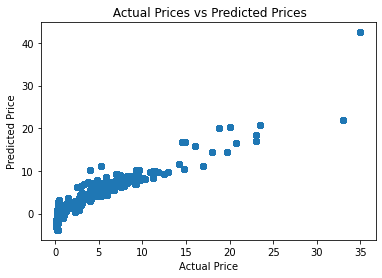

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [19]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8837403102391718


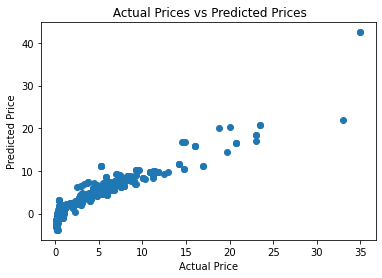

In [20]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [21]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [24]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.842861090072053


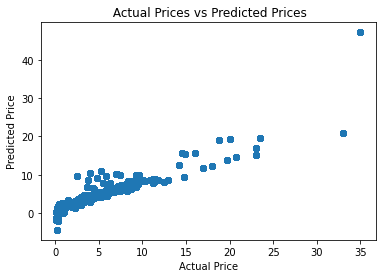

In [25]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8482777134269486


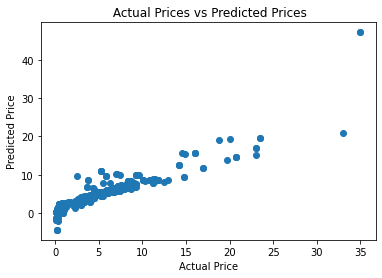

In [27]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()